In [20]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [21]:
df = pd.read_csv('./input/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
print(f'Shape of Dataset:\n Rows: {df.shape[0]}\n Columns: {df.shape[1]}')
print('#' * 30)
df.info()

Shape of Dataset:
 Rows: 16598
 Columns: 11
####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [23]:
df.duplicated().sum()

0

In [24]:
df.dropna(inplace=True)

In [25]:
df['Year'] = df['Year'].astype(int)

In [26]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [27]:
def mutHistPlot(df,xVar, sort=False):
    # data
    data = df[xVar].value_counts ().reset_index() 
    if sort:
        data=data.sort_values (by='index')
    # set plot dimensions
    plt.figure(figsize = (20, 8 ))
    # plot
    sns.barplot(data=data,
                x='index',
                 y=xVar,
                palette='mako',
                edgecolor='black'
                )
    
    # Add title and format it
    plt.title(f'Distribution of Games by {xVar}'.title(), fontsize= 14, weight ="bold")
    # Add x label and format it
    plt.xlabel (xVar.title(), fontsize = 15, weight = "bold")
    # Add y label and format it
    plt.ylabel('Frequency'.title(), fontsize =15, weight = "bold")
     

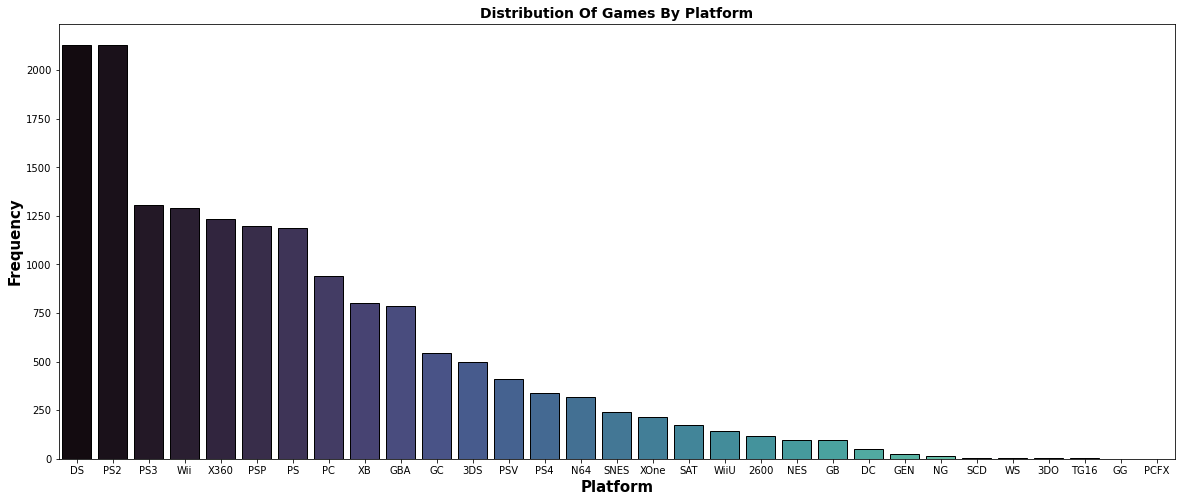

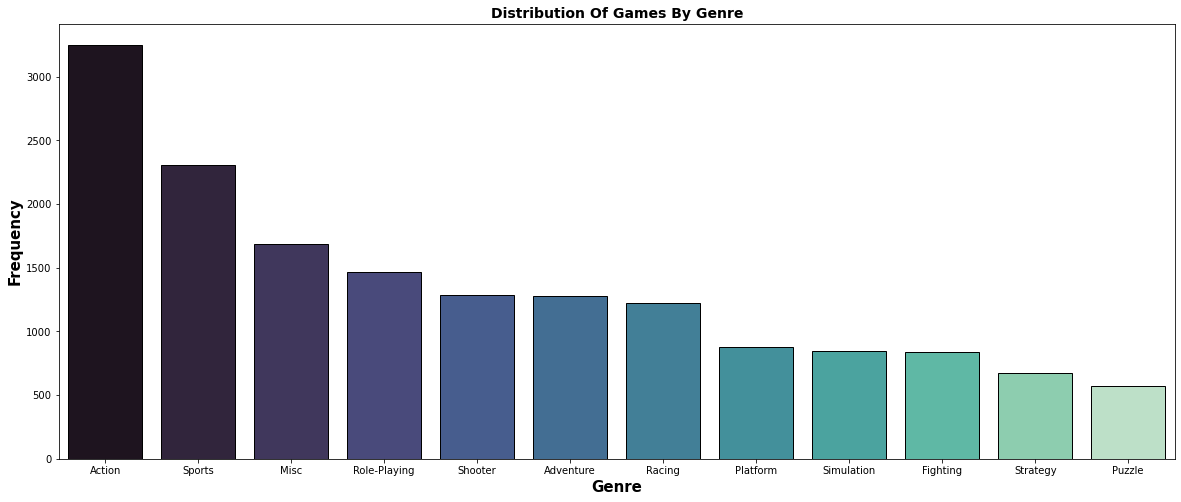

In [28]:
for col in ['Platform', 'Genre']:
    mutHistPlot(df, col)

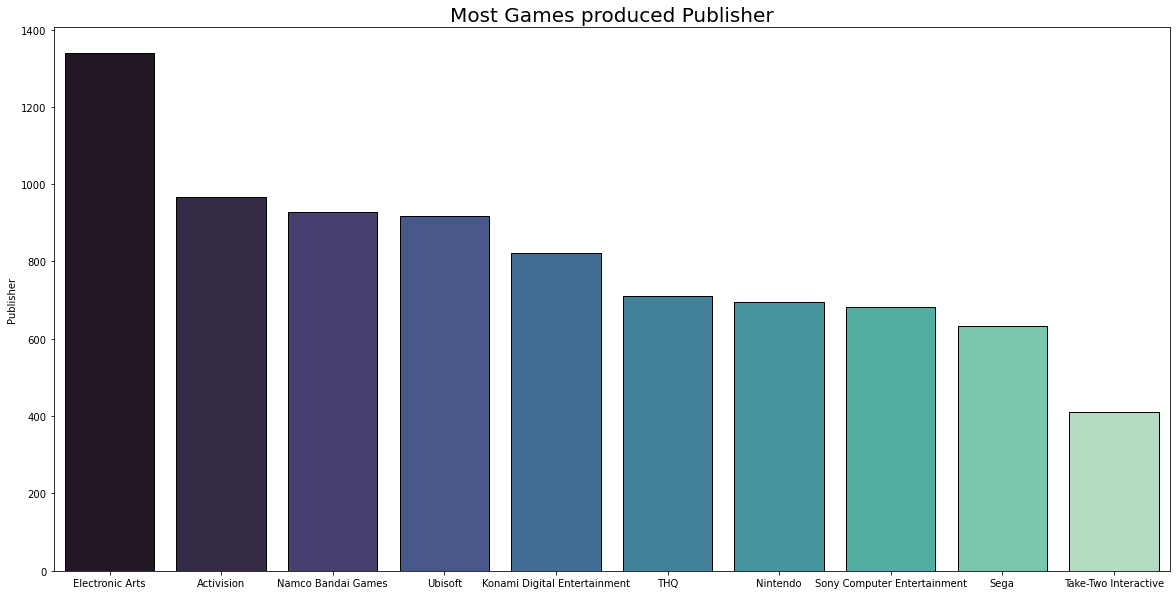

In [29]:
top10 = df['Publisher'].value_counts().index
plt.figure(figsize=(20,10))
sns.barplot(top10[:10], df['Publisher'].value_counts().iloc[:10], palette='mako', edgecolor='black')
plt.title('Most Games produced Publisher', fontsize=20)
plt.show()

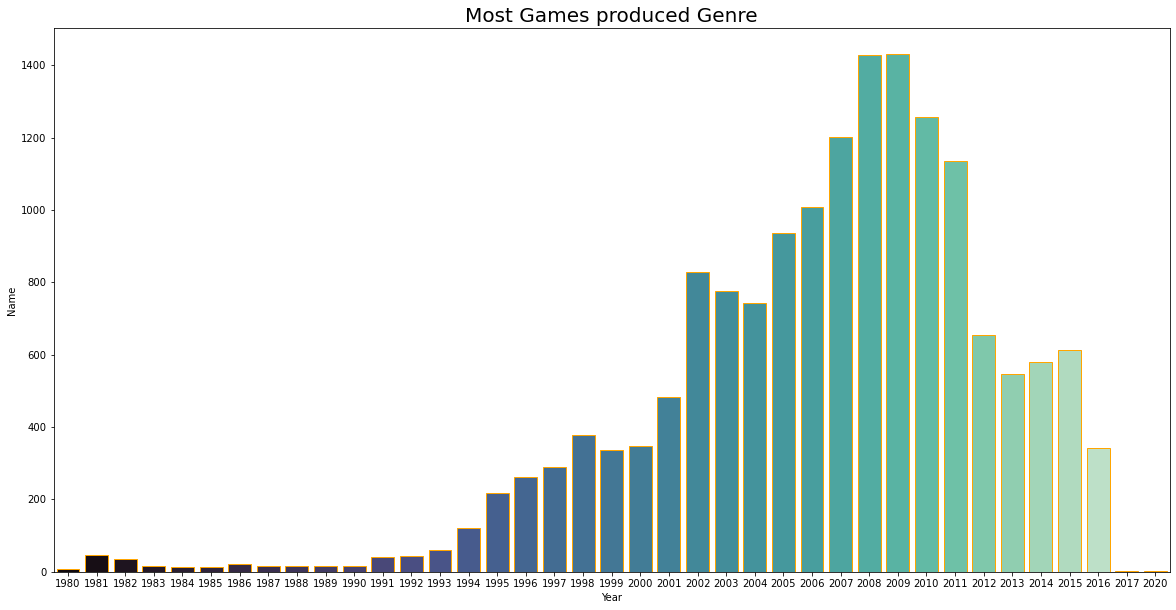

In [30]:
yearwisegame = df.groupby('Year')['Name'].count().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x=yearwisegame['Year'], y=yearwisegame['Name'], palette='mako', edgecolor='orange')
plt.title('Most Games produced Genre', fontsize=20)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Publisher'>

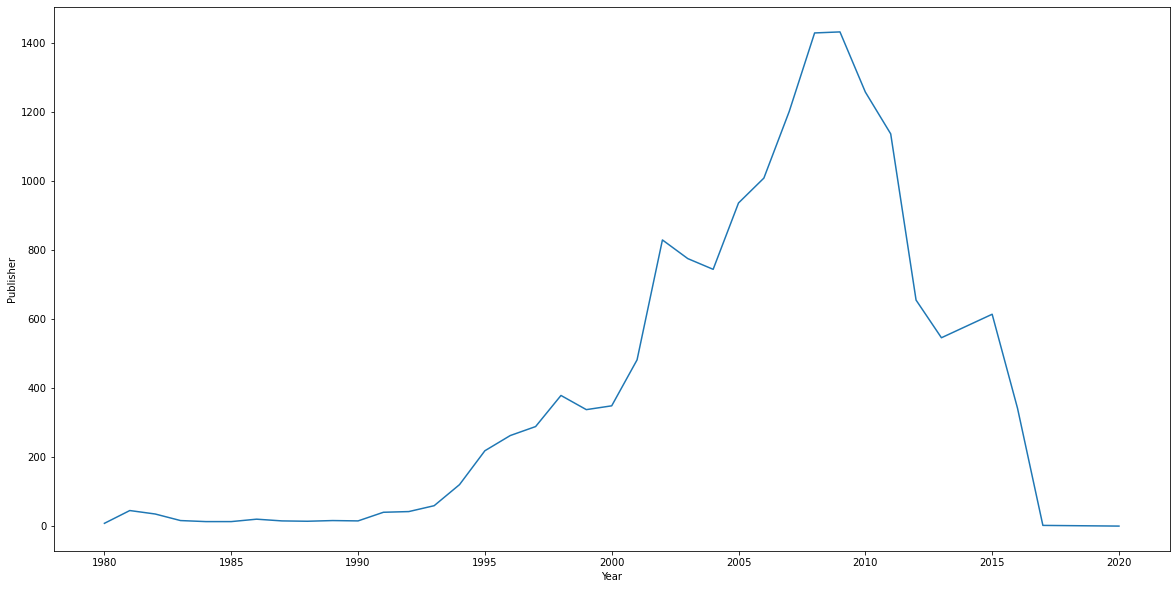

In [32]:
Publisher_Year = df.groupby('Year')['Publisher'].count().reset_index('Year')
plt.figure(figsize=(20,10))
sns.lineplot(data=Publisher_Year, x='Year', y='Publisher')

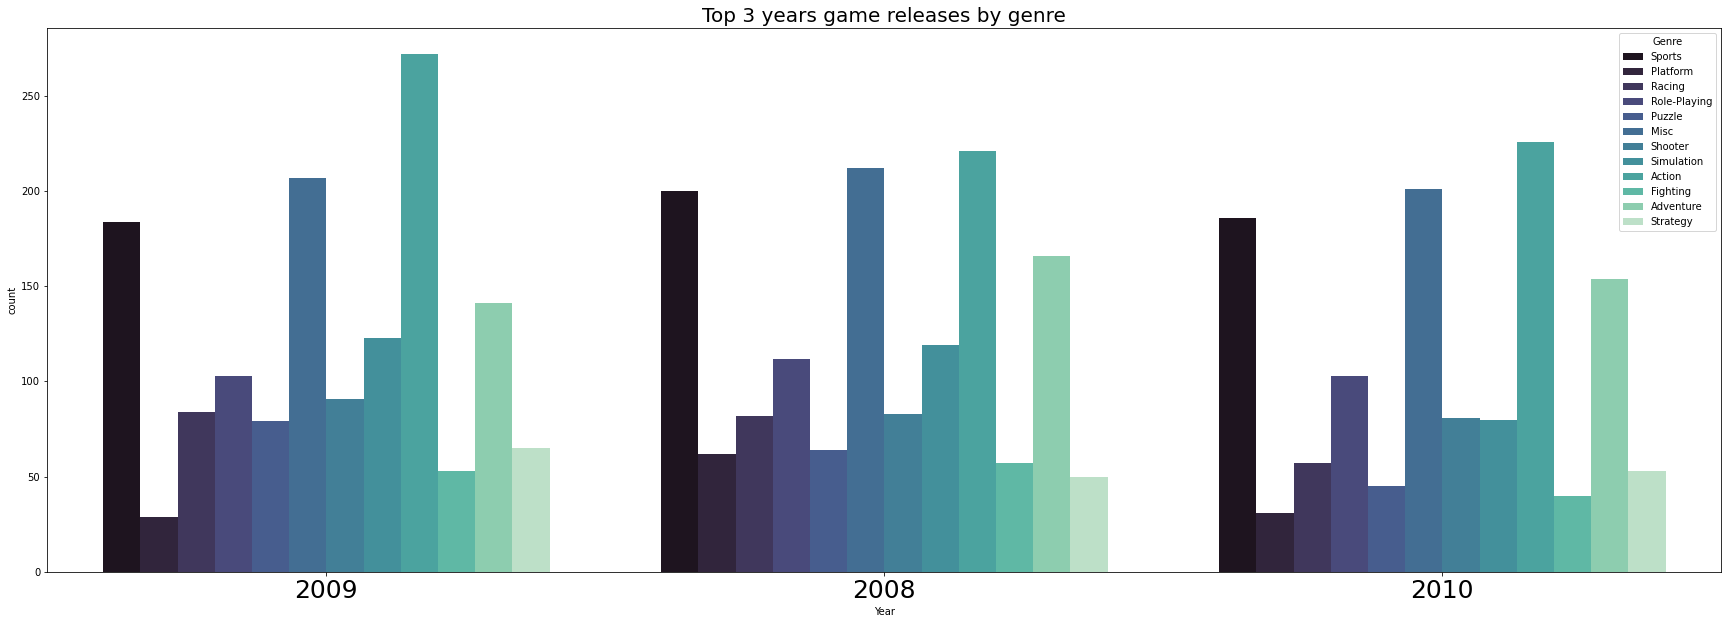

In [33]:
plt.figure(figsize=(30,10))
sns.countplot(x='Year', data=df, hue='Genre', order=df.Year.value_counts().iloc[:3].index, palette='mako')
plt.xticks(size=25, rotation=0)
plt.title('Top 3 years game releases by genre', fontsize=20)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

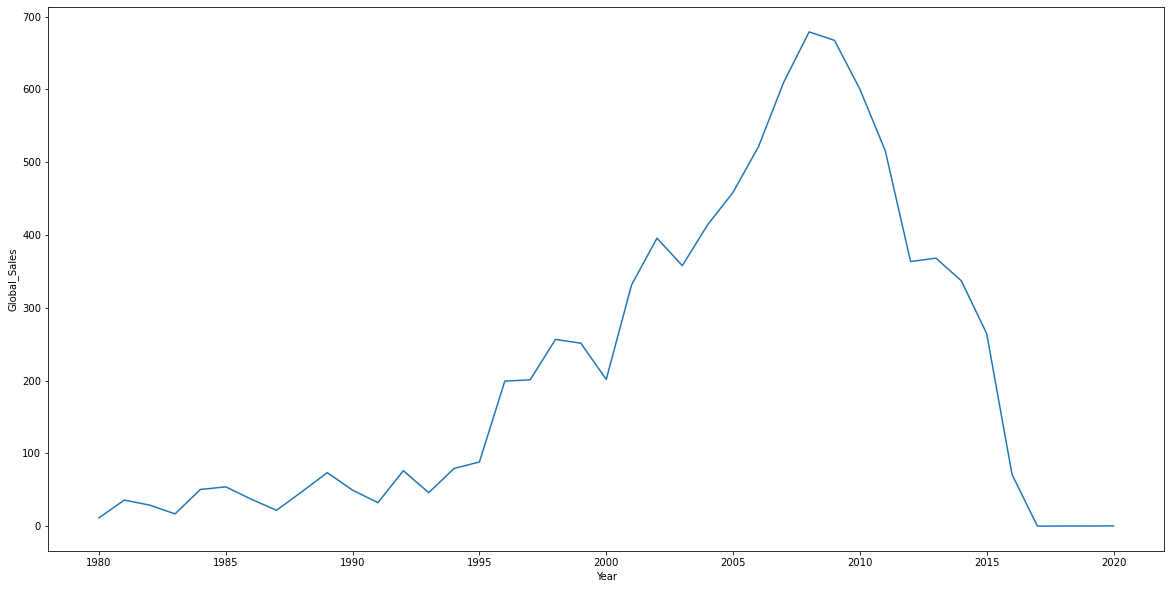

In [34]:
GSales_Year = df.groupby('Year')['Global_Sales'].sum().reset_index('Year')
plt.figure(figsize=(20,10))
sns.lineplot(data=GSales_Year, x='Year', y='Global_Sales')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Action'),
  Text(0, 1.5, 'Adventure'),
  Text(0, 2.5, 'Fighting'),
  Text(0, 3.5, 'Misc'),
  Text(0, 4.5, 'Platform'),
  Text(0, 5.5, 'Puzzle'),
  Text(0, 6.5, 'Racing'),
  Text(0, 7.5, 'Role-Playing'),
  Text(0, 8.5, 'Shooter'),
  Text(0, 9.5, 'Simulation'),
  Text(0, 10.5, 'Sports'),
  Text(0, 11.5, 'Strategy')])

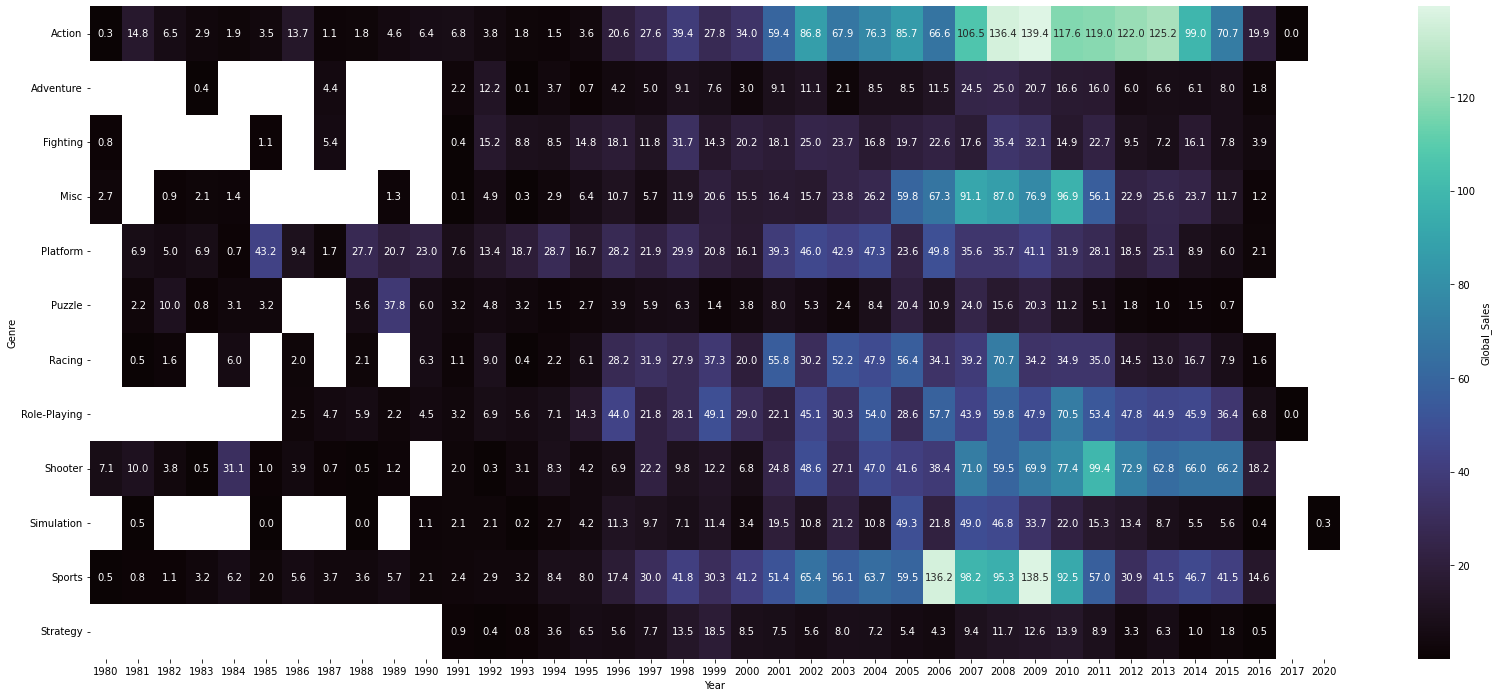

In [35]:
data = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack(['Year'])
plt.figure(figsize=(28,12))
sns.heatmap(data, annot=True, fmt='.1f', cmap='mako', cbar_kws={'label': 'Global_Sales'})
plt.yticks(rotation=0)

<AxesSubplot:xlabel='Year'>

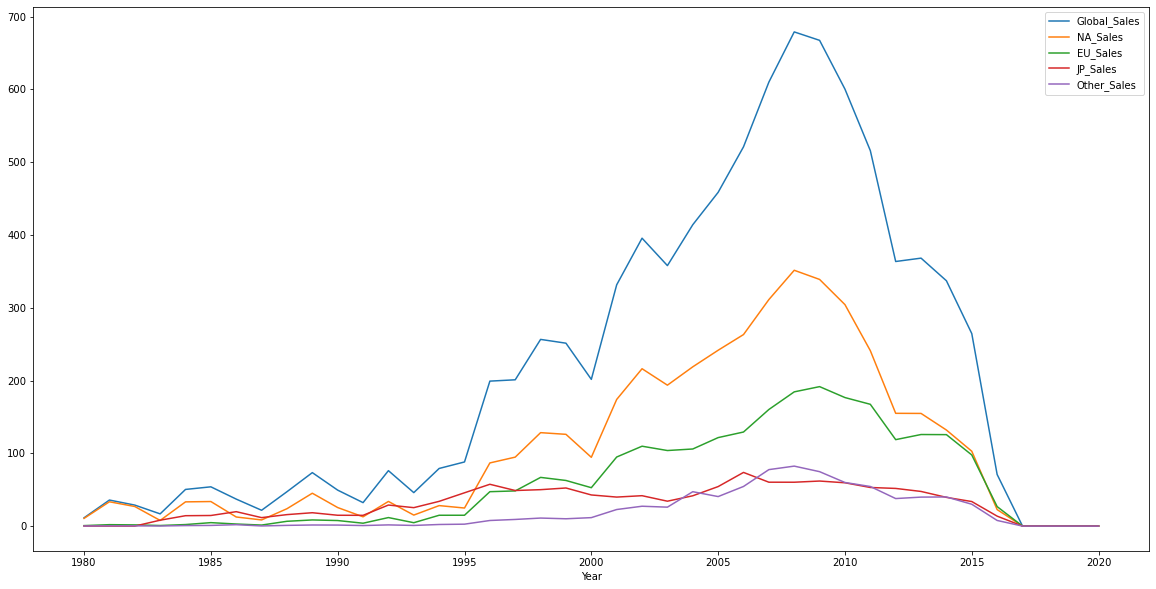

In [36]:
GSales_Year = df.groupby('Year')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
GSales_Year.plot(figsize=(20,10))